# Reading Data from External API

Often you want to add external data to your analysis. External data can be retrieved from API (Application Programable Interface) that is provided by various services such as CRM (Customer Relationship Management) systems. You can import HTML directly into Excel using _"Import"_.

In this notebook, we will learn how to use pandas _from_dict_ to load data from these external API

## Loading API data

We will load a few tables from simple API as well as complex ones

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

## Loading from simple API

If you have a simple API with no authentication, you can pass the URL of the requests library that we used in our previous toturial for loading HTML

In [24]:
url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/AMZN/daily/2015100100/2015103100'

import requests
response = requests.get(url)
response

<Response [200]>

We can use two methods to extract the data that we want from the JSON format. The first is using _json_normalize_ and the second is using _from_dict_

In [25]:
df = pd.json_normalize(response.json(), 'items')
df.head(5)

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,AMZN,daily,2015100100,all-access,all-agents,9
1,en.wikipedia,AMZN,daily,2015100200,all-access,all-agents,5
2,en.wikipedia,AMZN,daily,2015100300,all-access,all-agents,6
3,en.wikipedia,AMZN,daily,2015100400,all-access,all-agents,5
4,en.wikipedia,AMZN,daily,2015100500,all-access,all-agents,6


In [21]:
data = requests.get(url).json()['items']
df = pd.DataFrame.from_dict(data)
df.head(5)

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,AMZN,daily,2015100100,all-access,all-agents,9
1,en.wikipedia,AMZN,daily,2015100200,all-access,all-agents,5
2,en.wikipedia,AMZN,daily,2015100300,all-access,all-agents,6
3,en.wikipedia,AMZN,daily,2015100400,all-access,all-agents,5
4,en.wikipedia,AMZN,daily,2015100500,all-access,all-agents,6


## Simple Data Visualization


<AxesSubplot:xlabel='timestamp'>

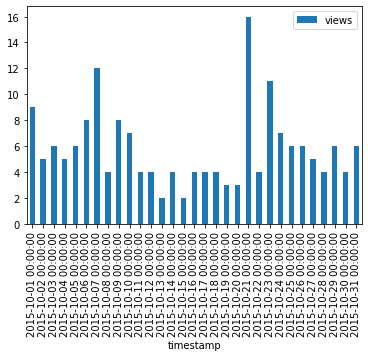

In [23]:
(
    df
    .assign(timestamp=lambda x: pd.to_datetime(x.timestamp, format='%Y%m%d%H', errors='coerce'))
    .plot
    .bar(x='timestamp', y=['views'])
)

## Loading from complex API

Many times pages will be more complex and we can still extract the relevant data. 